## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as pyplot
import read_data as rd
import Pass
import numpy as np
import glob
from scipy.interpolate import interp1d

## Read and display data for interval selction

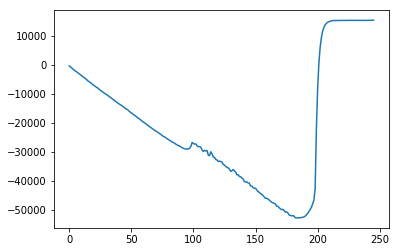

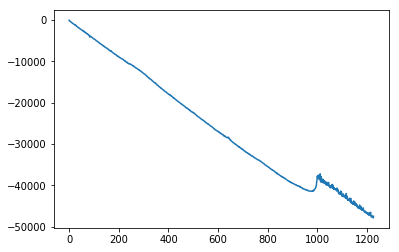

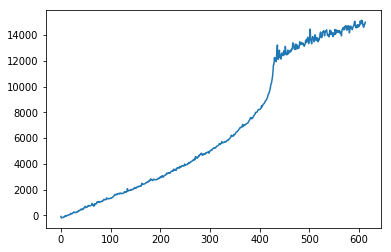

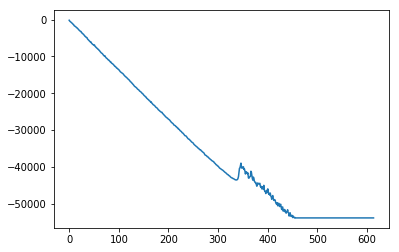

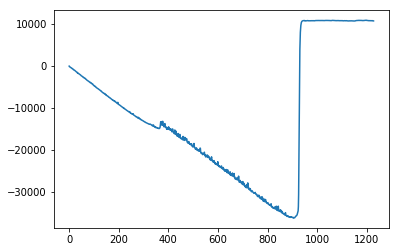

In [2]:
fileList = glob.glob('data\\*')
passList = [rd.read_pass_data(file) for file in fileList]
siz = len(passList)


#fig1 = pyplot.figure()
for pas in passList:
    #ax = fig1.add_subplot( (siz)*100 + passList.index(pas)+11)
    fig = pyplot.figure()
    ax = fig.add_subplot(111)
    ax.plot(pas.depth)



## Compute coating thickness

for data\profil 200-1pc rad25um.txt coating thickness is:
6849.826351633278
for data\profil 200-2pc rad25um.txt coating thickness is:
6490.641891999416
for data\profil 200-4pc rad25um.txt coating thickness is:
6280.063142187597
for data\profil 200-8pc rad25um.txt coating thickness is:
6350.539760099075
for data\profil reff 200 rad25um.txt coating thickness is:
3383.0760640112444


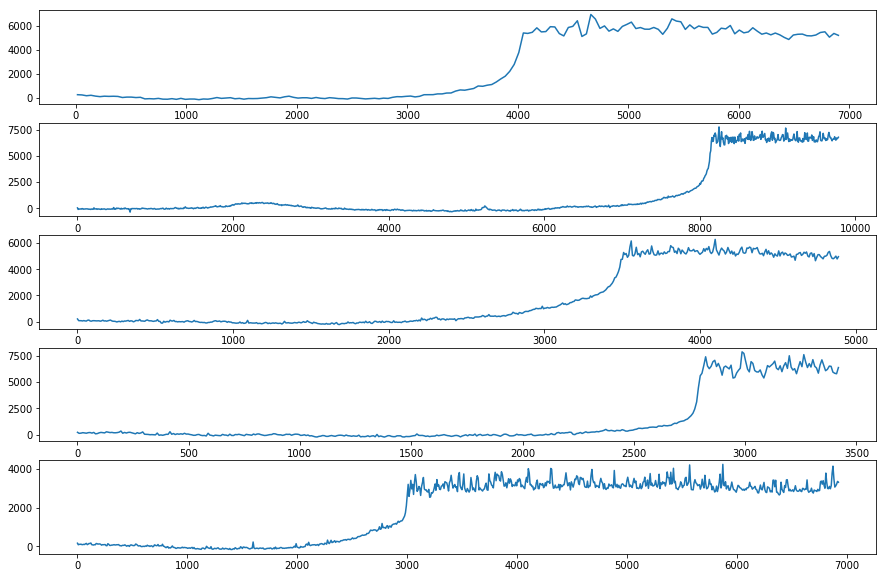

In [3]:
limits = [[0, 80, 100, 170],
          [0, 900, 1000, 1200],
          [0, 300, 430, 600],
          [0, 300, 350, 420],
          [0, 300, 390, 850]]

fig2 = pyplot.figure(figsize = (15,2*siz))

for i in range(len(passList)):
    min1 = limits[i][0]
    max1 = limits[i][1]
    min2 = limits[i][2]
    max2 = limits[i][3]
    fit1 = np.polyfit( passList[i].distance[min1:max1], passList[i].depth[min1:max1], 1 )
    fit2 = np.polyfit( passList[i].distance[min2:max2], passList[i].depth[min2:max2], 1 )
    print('for ' + fileList[i] + ' coating thickness is:')
    print(np.abs(fit1[1]-fit2[1]))
    passList[i].depth = passList[i].depth - np.poly1d(fit1)(passList[i].distance)
    ax = fig2.add_subplot( (siz)*100 + i+11)
    ax.plot(passList[i].distance[min1:max2], passList[i].depth[min1:max2])


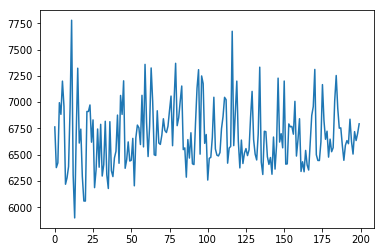

In [22]:
pyplot.plot(passList[1].depth[1000:1200])